In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Common Functions

In [2]:
def accuracy(y_true, y_pred, thresh=100):
    return np.sum(np.where(abs(y_true-y_pred)<thresh, 1, 0)) / len(y_true)

def get_results(splits, tree_depth, thresh):
    
    models = {"Linear Regressor":LinearRegression(), 
              "SGDRegressor":SGDRegressor(learning_rate='constant', eta0=0.0001, max_iter=10000000),
              "Decision Tree Regressor":DecisionTreeRegressor(max_depth=tree_depth), 
              "ExtraTreeRegressor":ExtraTreesRegressor(max_depth=tree_depth),
              "RandomForestRegressor":RandomForestRegressor()}
#               "MLPRegressor":MLPRegressor(learning_rate='adaptive', max_iter=100000, hidden_layer_sizes=(100,20), learning_rate_init=0.001)}
    
    for model_name,model in models.items():
        print("\n-------------",model_name,"-------------")
        model.fit(splits[0], splits[2]) 
        y_pred_train = model.predict(splits[0])
        y_pred_test = model.predict(splits[1]) 
        mse_accuracy(splits, [y_pred_train, y_pred_test], thresh)


def train_LR(splits):
    model = LinearRegression()
    model.fit(splits[0], splits[2])    
    y_pred_train = model.predict(splits[0])
    y_pred_test = model.predict(splits[1]) 
    return [y_pred_train, y_pred_test]

def train_DT(splits, d=5):
    model = DecisionTreeRegressor(max_depth = d)
#     model = ExtraTreeRegressor(max_depth=d)
    model.fit(splits[0], splits[2])    
    y_pred_train = model.predict(splits[0])
    y_pred_test = model.predict(splits[1]) 
    return [y_pred_train, y_pred_test]

def mse_accuracy(splits, results, thresh):
    print("MSE Train: ", mean_squared_error(splits[2], results[0])**0.5)
    print("MSE Test: ", mean_squared_error(splits[3], results[1])**0.5)
    print("train accuracy with threshold =", thresh, " : ", accuracy(splits[2], results[0], thresh))
    print("test accuracy with threshold =", thresh, " : ", accuracy(splits[3], results[1], thresh))

# GDP

In [3]:
df_gdp = pd.read_excel("datasets/gdp.xls", skiprows=2, header=1, index_col=0)
gdp_2017 = df_gdp.loc[:,["2017"]].rename({"2017":"GDP"},axis=1)
gdp_2017 = gdp_2017.dropna()
gdp_2017.dtypes

GDP    float64
dtype: object

In [4]:
# gdp_per_capita[2015], gdp_2017

# Population

In [5]:
df_pop = pd.read_csv("datasets/population.csv", skiprows=2, header=1, index_col='Country Name')
pop_2017 = df_pop.loc[:,["2017"]].rename({"2017":"Population"},axis=1)
pop_2017.dtypes

Population    float64
dtype: object

# Energy Consumption

In [6]:
df_energy = pd.read_csv("datasets/energy_2017.csv")
df_energy.drop(columns=["Quantity Footnotes",'Unit','Year'], inplace=True)
df_energy

,Country or Area,Commodity - Transaction,Quantity
0,Afghanistan,Electricity - Gross production,1098.2
1,Afghanistan,From combustible fuels – Main activity,160.3
2,Afghanistan,From combustible fuels – Main activity – Elect...,163.3
3,Afghanistan,Hydro – Main activity,616.0
4,Afghanistan,From combustible fuels – Autoproducer,8.0
...,...,...,...
6661,Zimbabwe,"Electricity - total production, main activity",7377.0
6662,Zimbabwe,Electricity - Gross demand,9619.0
6663,Zimbabwe,"Electricity - total production, autoproducer",167.0
6664,fnSeqID,Footnote,NaN


In [7]:
num_top_features = 20
top_cat =  df_energy.groupby(['Commodity - Transaction']).count()\
                        .sort_values(by="Country or Area",ascending=False).head(num_top_features).index
df_energy = df_energy[df_energy['Commodity - Transaction'].isin(top_cat)]
energy = pd.pivot_table(df_energy, values="Quantity", index=['Country or Area'],columns=['Commodity - Transaction'])
energy = energy * 1000
energy.head(1)

Commodity - Transaction,Electricity - Consumption by commercial and public services,Electricity - Consumption by households,"Electricity - Consumption by manufacturing, construction and non-fuel industry",Electricity - Consumption by other,"Electricity - Consumption by other manuf., const. and non-fuel ind.",Electricity - Consumption not elsewhere specified (industry),Electricity - Final energy consumption,Electricity - Gross demand,Electricity - Gross production,Electricity - Losses,"Electricity - Own use by electricity, heat and CHP plants",Electricity - net production,"Electricity - total production, autoproducer","Electricity - total production, main activity",From combustible fuels – Autoproducer,From combustible fuels – Autoproducer – Electricity plants,From combustible fuels – Main activity,From combustible fuels – Main activity – Electricity plants,Hydro – Main activity,Solar – Main activity
Country or Area,,,,,,,,,,,,,,,,,,,,
Afghanistan,312800.0,2811800.0,945000.0,3570400.0,945000.0,NaN,4515400.0,5621400.0,1098200.0,710000.0,88100.0,1010100.0,321900.0,776300.0,8000.0,8000.0,160300.0,163300.0,616000.0,NaN


In [8]:
energy = energy.merge(pop_2017, how='inner', left_index=True, right_index=True)
energy = energy.merge(gdp_2017, how='inner', left_index=True, right_index=True)
energy = energy.iloc[:,:].div(energy['Population'], axis=0)
energy.drop(columns=['Population'], inplace=True)
energy = energy.fillna(0)
print(len(energy))
energy.head(1)


174


,Electricity - Consumption by commercial and public services,Electricity - Consumption by households,"Electricity - Consumption by manufacturing, construction and non-fuel industry",Electricity - Consumption by other,"Electricity - Consumption by other manuf., const. and non-fuel ind.",Electricity - Consumption not elsewhere specified (industry),Electricity - Final energy consumption,Electricity - Gross demand,Electricity - Gross production,Electricity - Losses,...,Electricity - net production,"Electricity - total production, autoproducer","Electricity - total production, main activity",From combustible fuels – Autoproducer,From combustible fuels – Autoproducer – Electricity plants,From combustible fuels – Main activity,From combustible fuels – Main activity – Electricity plants,Hydro – Main activity,Solar – Main activity,GDP
Afghanistan,0.008618,0.077468,0.026036,0.098368,0.026036,0.0,0.124404,0.154875,0.030256,0.019561,...,0.027829,0.008869,0.021388,0.00022,0.00022,0.004416,0.004499,0.016971,0.0,556.302002


In [9]:
X = energy.drop(columns = ['GDP'])
y = energy['GDP']

In [10]:
splits = train_test_split(X, y, test_size=0.2, random_state=82)
get_results(splits, tree_depth=5, thresh=2000)


------------- Linear Regressor -------------
MSE Train:  10509.66300275136
MSE Test:  13490.481355488833
train accuracy with threshold = 2000  :  0.460431654676259
test accuracy with threshold = 2000  :  0.4

------------- SGDRegressor -------------
MSE Train:  13313.179031045578
MSE Test:  14599.30850262828
train accuracy with threshold = 2000  :  0.460431654676259
test accuracy with threshold = 2000  :  0.5142857142857142

------------- Decision Tree Regressor -------------
MSE Train:  3388.7231581049114
MSE Test:  24835.565477537264
train accuracy with threshold = 2000  :  0.6906474820143885
test accuracy with threshold = 2000  :  0.5714285714285714

------------- ExtraTreeRegressor -------------
MSE Train:  4216.865431320076
MSE Test:  9257.450567032443
train accuracy with threshold = 2000  :  0.5827338129496403
test accuracy with threshold = 2000  :  0.5428571428571428

------------- RandomForestRegressor -------------
MSE Train:  5967.892365877011
MSE Test:  10135.269922351428
t

# CO2 vs GDP : Developed vs Developing

In [11]:
df_co2 = pd.read_csv("datasets/co2.txt", index_col=['country'])
df_co2.columns

Index(['iso_code', 'year', 'co2', 'co2_growth_prct', 'co2_growth_abs',
       'consumption_co2', 'trade_co2', 'trade_co2_share', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'cement_co2', 'coal_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita',
       'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp',
       'population', 'gdp'],
      dtype='object')

In [12]:
df_co2

,iso_code,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
Afghanistan,AFG,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
Afghanistan,AFG,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
Afghanistan,AFG,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
Afghanistan,AFG,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2014,11.962,2.838,0.330,12.760,0.798,6.671,0.880,0.939,...,4.865,11.24,0.827,6.27,0.461,NaN,NaN,NaN,13587000.0,2.474828e+10
Zimbabwe,ZWE,2015,12.163,1.685,0.202,13.010,0.847,6.966,0.880,0.942,...,4.885,11.87,0.859,6.68,0.484,NaN,NaN,NaN,13815000.0,2.503057e+10
Zimbabwe,ZWE,2016,10.807,-11.146,-1.356,11.809,1.001,9.264,0.770,0.842,...,4.703,11.92,0.850,6.55,0.467,NaN,NaN,NaN,14030000.0,2.515176e+10


In [13]:
df_co2['gdp_per_capita'] = df_co2['gdp'] / df_co2['population']
# df_co2['energy_per_capita'] = df_co2['ener']

In [14]:
co2 = pd.pivot_table(df_co2, values="co2", index=['country'],columns=['year']).loc[:,"1960":"2016"]
co2_per_capita = pd.pivot_table(df_co2, values="co2_per_capita", index=['country'],columns=['year']).loc[:,"1960":"2016"]
co2_per_gdp = pd.pivot_table(df_co2, values="co2_per_gdp", index=['country'],columns=['year']).loc[:,"1960":"2016"]
ghg_per_capita = pd.pivot_table(df_co2, values="ghg_per_capita", index=['country'],columns=['year']).loc[:,"1960":"2016"]
gdp_per_capita = pd.pivot_table(df_co2, values="gdp_per_capita", index=['country'],columns=['year']).loc[:,"1960":"2016"]
energy_per_capita = pd.pivot_table(df_co2, values="energy_per_capita", index=['country'],columns=['year']).loc[:,"1960":"2016"]
energy_per_gdp = pd.pivot_table(df_co2, values="energy_per_gdp", index=['country'],columns=['year']).loc[:,"1960":"2016"]



In [27]:
developed = ['United States', 'United Kingdom', 'Germany', 'Norway', 'Singapore', 'Canada']
developing = ['India', 'China', 'Brazil', 'Nigeria', 'Mexico', 'Russia']

In [28]:
def plot_co2_gdp(countries):
    fig, ax = plt.subplots(2,3, figsize=(20,10))
    
    for i,country in enumerate(countries):
        
        my_co2 = co2_per_capita.loc[country]
        my_gdp = gdp_per_capita.loc[country,"1960":"2016"]
        x = np.arange(1960,2017)
        
        color = 'tab:red'
        ax1 = ax[i//3, i%3]
        ax1.set_xlabel('Year')
        ax1.set_ylabel('GDP per Capita', color=color)
        ax1.plot(x,list(my_gdp), color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('CO2 per Capita', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,list(my_co2), color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.title(country)


        fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.figure(facecolor='w', dpi=260)    
    plt.show()

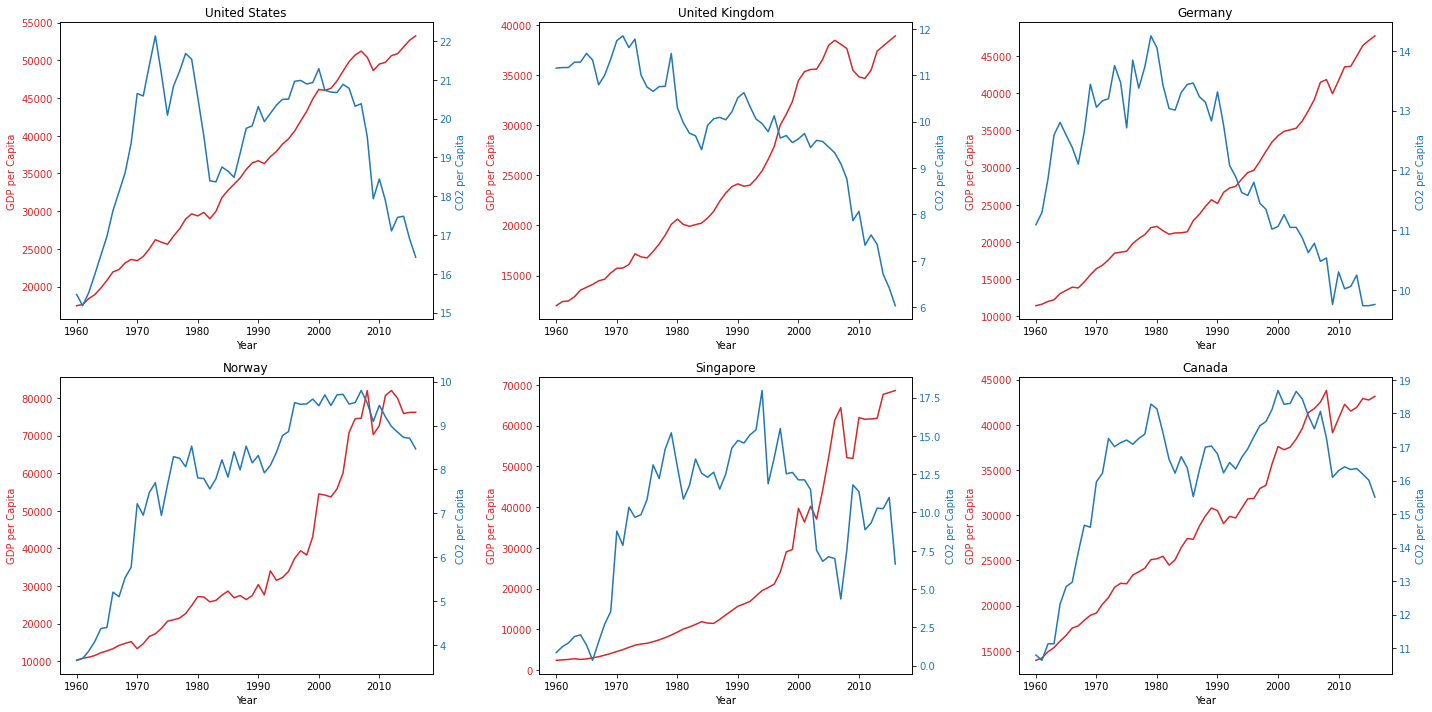

<Figure size 1560x1040 with 0 Axes>

In [29]:
plot_co2_gdp(developed)

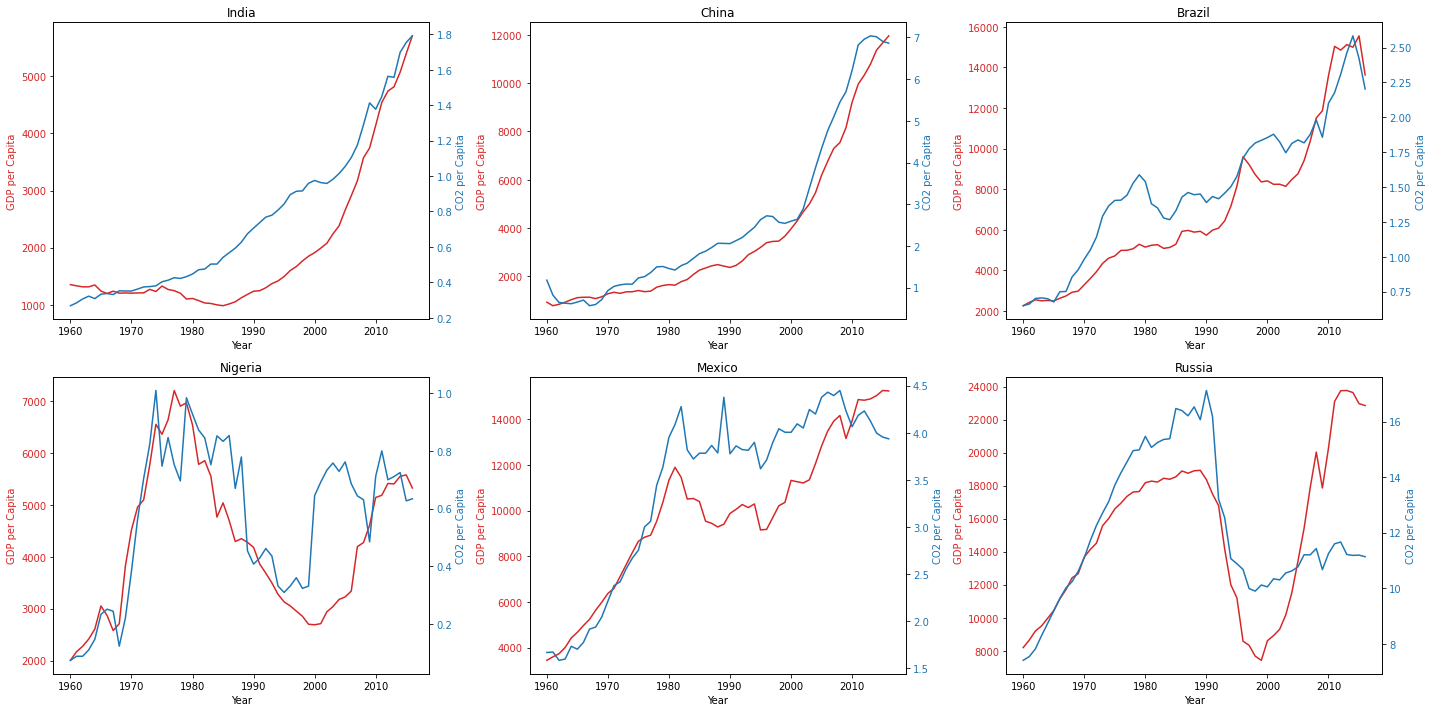

<Figure size 1560x1040 with 0 Axes>

In [30]:
plot_co2_gdp(developing)

# CO2 + Energy Consumption

In [31]:
df_co2_2017 = df_co2[df_co2['year']==2017][['co2_per_capita','cement_co2_per_capita','oil_co2_per_capita']].dropna()

In [32]:
df_co2_2017 = df_co2_2017.merge(energy, how='inner', left_index=True, right_index=True)

In [33]:
X = df_co2_2017.drop(columns = ['GDP'])
y = df_co2_2017['GDP']

In [34]:
splits = train_test_split(X, y, test_size=0.2, random_state=82)
get_results(splits, tree_depth=5, thresh=2000)


------------- Linear Regressor -------------
MSE Train:  7723.201686441449
MSE Test:  6383.590614571356
train accuracy with threshold = 2000  :  0.5
test accuracy with threshold = 2000  :  0.5769230769230769

------------- SGDRegressor -------------
MSE Train:  10589.98063746357
MSE Test:  8419.28181761
train accuracy with threshold = 2000  :  0.44
test accuracy with threshold = 2000  :  0.6538461538461539

------------- Decision Tree Regressor -------------
MSE Train:  2551.4782605185305
MSE Test:  9902.973314705245
train accuracy with threshold = 2000  :  0.85
test accuracy with threshold = 2000  :  0.6153846153846154

------------- ExtraTreeRegressor -------------
MSE Train:  2353.391472233596
MSE Test:  5452.056454068986
train accuracy with threshold = 2000  :  0.72
test accuracy with threshold = 2000  :  0.5384615384615384

------------- RandomForestRegressor -------------
MSE Train:  4241.072560597717
MSE Test:  5996.257240335539
train accuracy with threshold = 2000  :  0.75
tes

# Energy vs GDP

This looks same as CO2 vs GDP

In [35]:
def plot_energy_gdp(countries):
    fig, ax = plt.subplots(2,3, figsize=(20,10))
    
    for i,country in enumerate(countries):
        
        my_co2 = energy_per_capita.loc[country]
        my_gdp = gdp_per_capita.loc[country,"1960":"2016"]
        x = np.arange(1960,2017)
        
        color = 'tab:red'
        ax1 = ax[i//3, i%3]
        ax1.set_xlabel('Year')
        ax1.set_ylabel('GDP per Capita', color=color)
        ax1.plot(x,list(my_gdp), color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('CO2 per Capita', color=color)  # we already handled the x-label with ax1
        ax2.plot(x,list(my_co2), color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.title(country)


        fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [36]:
# plot_energy_gdp(developed)

In [37]:
# plot_energy_gdp(developing)

# Energy per GDP (not useful)

In [38]:
# print(energy_per_gdp.loc[developing,2015])
# print(energy_per_gdp.loc[developed,2015])

In [39]:
# tmp = energy_per_gdp.loc[developed+developing,2015]
# tmp.plot(kind='bar')

# Work

In [40]:
df_work = pd.read_csv("datasets/occupation.csv")

In [41]:
# preprocess
df_work.rename(columns = {'Country or Area':'Country'}, inplace=True)
df_work = df_work[df_work['Year'].str.len()<5]
df_work['Year'] = df_work['Year'].astype(int,copy=False)
df_work['Year'].unique()

array([2011, 2001, 2010, 2000, 2016, 2006, 2009, 1999, 2013, 2012, 2008,
       1998, 2002, 2017, 2007, 2014, 1995, 2015, 2005, 2003, 2004, 1996])

In [42]:
for country in df_work['Country'].unique():
    most_recent_year = df_work[df_work['Country']==country]['Year'].max()

    index_to_remove = df_work[ (df_work['Year']!=most_recent_year) & (df_work["Country"]==country)].index
    df_work.drop(index_to_remove, inplace = True)
    

In [43]:
df_work_pivot = pd.pivot_table(df_work, values="Value", index=['Country'],columns=['Occupation'])
df_work_pivot = df_work_pivot.fillna(0)

In [44]:
col1 = 'Administrative and Managerial Workers (ISCO 68 - 2)'
col2 = 'Administrative, Executive and Managerial Workers (ISCO 58 - 1)'
df_work_pivot['Admin'] = df_work_pivot[col1] + df_work_pivot[col2]
df_work_pivot.drop(columns=[col1,col2], inplace=True)

col1 = 'Armed forces (ISCO 88 - 0)'
col2 = 'Armed forces occupations (ISCO 08 - 0)'
col3 = 'Members of the Armed Forces (ISCO 58 - Y)'
col4 = 'Members of the Armed Forces (ISCO 68 - Y)'
df_work_pivot['Armed forces'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3] + df_work_pivot[col4]
df_work_pivot.drop(columns=[col1,col2,col3,col4], inplace=True)

col1 = 'Clerical Workers (ISCO 58 - 2)'
col2 = 'Clerical and Related Workers (ISCO 68 - 3)'
col3 = 'Clerical support workers (ISCO 08 - 4)'
col4 = 'Clerks (ISCO 88 - 4)'
df_work_pivot['Clerk'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3] + df_work_pivot[col4]
df_work_pivot.drop(columns=[col1,col2,col3,col4], inplace=True)

col1 = 'Craft and related trades workers (ISCO 08 - 7)'
col2 = 'Craft and related trades workers (ISCO 88 - 7)'
col3 = 'Craftsmen, Production-Process Workers, and Labourers Not Elsewhere Classified (ISCO 58 - 7/8)'
df_work_pivot['Craft'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3]
df_work_pivot.drop(columns=[col1,col2,col3], inplace=True)

col1 = 'Elementary occupations (ISCO 08 - 9)'
col2 = 'Elementary occupations (ISCO 88 - 9)'
df_work_pivot['Elementary occupations'] = df_work_pivot[col1] + df_work_pivot[col2]
df_work_pivot.drop(columns=[col1,col2], inplace=True)

col1 = 'Plant and machine operators and assemblers (ISCO 88 - 8)'
col2 = 'Plant and machine operators, and assemblers (ISCO 08 - 8)'
df_work_pivot['Plant and machine operators'] = df_work_pivot[col1] + df_work_pivot[col2]
df_work_pivot.drop(columns=[col1,col2], inplace=True)

col1 = 'Professional, Technical and Related Workers (ISCO 58 - 0)'
col2 = 'Professional, Technical and Related Workers (ISCO 68 - 0/1)'
col3 = 'Professionals (ISCO 08 - 2)'
col4 = 'Professionals (ISCO 88 - 2)'
col5 = 'Technicians and associate professionals (ISCO 08 - 3)'
col6 = 'Technicians and associate professionals (ISCO 88 - 3)'
df_work_pivot['Professionals'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3] + \
        df_work_pivot[col4] + df_work_pivot[col5] + df_work_pivot[col6]
df_work_pivot.drop(columns=[col1,col2,col3,col4,col5,col6], inplace=True)

col1 = 'Sales Workers (ISCO 58 - 3)'
col2 = 'Sales Workers (ISCO 68 - 4)'
col3 = 'Service Workers (ISCO 68 - 5)'
col4 = 'Service and sales workers (ISCO 08 - 5)'
col5 = 'Service workers and shop and market sales workers (ISCO 88 - 5)'
df_work_pivot['Sales and service'] = df_work_pivot[col1] + df_work_pivot[col2] + \
                            df_work_pivot[col3] + df_work_pivot[col4] + df_work_pivot[col5]
df_work_pivot.drop(columns=[col1,col2,col3,col4,col5], inplace=True)

col1 = 'Skilled agricultural and fishery workers (ISCO 88 - 6)'
col2 = 'Skilled agricultural, forestry and fishery workers (ISCO 08 - 6)'
df_work_pivot['Agriculture'] = df_work_pivot[col1] + df_work_pivot[col2]
df_work_pivot.drop(columns=[col1,col2], inplace=True)

col1 = 'Total (ISCO 08)'
col2 = 'Total (ISCO 58)'
col3 = 'Total (ISCO 68)'
col4 = 'Total (ISCO 88)'
df_work_pivot['Total'] = df_work_pivot[col1] + df_work_pivot[col2] + df_work_pivot[col3] + df_work_pivot[col4]
df_work_pivot.drop(columns=[col1,col2,col3,col4], inplace=True)

In [45]:
df_work_pivot.columns

Index(['Agricultural, Animal Husbandry and Forestry Workers, Fishermen and Hunters (ISCO 68 - 6)',
       'Farmers, Fishermen, Hunters, Loggers and Related Workers (ISCO 58 - 4)',
       'Legislators, senior officials and managers (ISCO 88 - 1)',
       'Managers (ISCO 08 - 1)',
       'Miners, Quarrymen and Related Workers (ISCO 58 - 5)',
       'Production and Related Workers, Transport Equipment Operators and Labourers (ISCO 68 - 7/8/9)',
       'Service, Sport and Recreation Workers (ISCO 58 - 9)', 'Unknown',
       'Workers Not Classifiable by Occupation (ISCO 68 - X)',
       'Workers in Transport and Communication Occupations (ISCO 58 - 6)',
       'Admin', 'Armed forces', 'Clerk', 'Craft', 'Elementary occupations',
       'Plant and machine operators', 'Professionals', 'Sales and service',
       'Agriculture', 'Total'],
      dtype='object', name='Occupation')

In [46]:
# work = df_work_pivot.merge(gdp_per_capita[[2015]], how='inner', left_index=True, right_on="country")
df_work_pivot = df_work_pivot*1000
work = df_work_pivot.merge(gdp_2017, how='inner', left_index=True, right_index=True)
work = work.merge(pop_2017, how='inner', left_index=True, right_index=True)
# work = work.merge(gdp_2017, how='inner', left_index=True, right_index=True)
work = work.iloc[:,:].div(work['Population'], axis=0)
work = work.fillna(0)
work.drop(columns=['Population'], inplace=True)
work.head(1)

,"Agricultural, Animal Husbandry and Forestry Workers, Fishermen and Hunters (ISCO 68 - 6)","Farmers, Fishermen, Hunters, Loggers and Related Workers (ISCO 58 - 4)","Legislators, senior officials and managers (ISCO 88 - 1)",Managers (ISCO 08 - 1),"Miners, Quarrymen and Related Workers (ISCO 58 - 5)","Production and Related Workers, Transport Equipment Operators and Labourers (ISCO 68 - 7/8/9)","Service, Sport and Recreation Workers (ISCO 58 - 9)",Unknown,Workers Not Classifiable by Occupation (ISCO 68 - X),Workers in Transport and Communication Occupations (ISCO 58 - 6),...,Armed forces,Clerk,Craft,Elementary occupations,Plant and machine operators,Professionals,Sales and service,Agriculture,Total,GDP
Albania,0.0,0.0,0.0,2.815656,0.0,0.0,0.0,1.791385,0.0,0.0,...,0.601181,1.486897,9.028382,3.477623,4.345892,13.52378,10.755268,15.090023,62.916086,4531.020806


In [47]:
# remove columns with lots of missing values
total = len(work)
remove_these = []
for col in work.columns:
    if len(work[work[col]>0]) < 0.7 * total:
        remove_these.append(col)
print(remove_these)
work.drop(columns=remove_these, inplace=True)

['Agricultural, Animal Husbandry and Forestry Workers, Fishermen and Hunters (ISCO 68 - 6)', 'Farmers, Fishermen, Hunters, Loggers and Related Workers (ISCO 58 - 4)', 'Legislators, senior officials and managers (ISCO 88 - 1)', 'Managers (ISCO 08 - 1)', 'Miners, Quarrymen and Related Workers (ISCO 58 - 5)', 'Production and Related Workers, Transport Equipment Operators and Labourers (ISCO 68 - 7/8/9)', 'Service, Sport and Recreation Workers (ISCO 58 - 9)', 'Unknown', 'Workers Not Classifiable by Occupation (ISCO 68 - X)', 'Workers in Transport and Communication Occupations (ISCO 58 - 6)', 'Admin', 'Armed forces']


In [48]:
# work.iloc[:,:7] = work.iloc[:,:7].div(work.Total, axis=0)

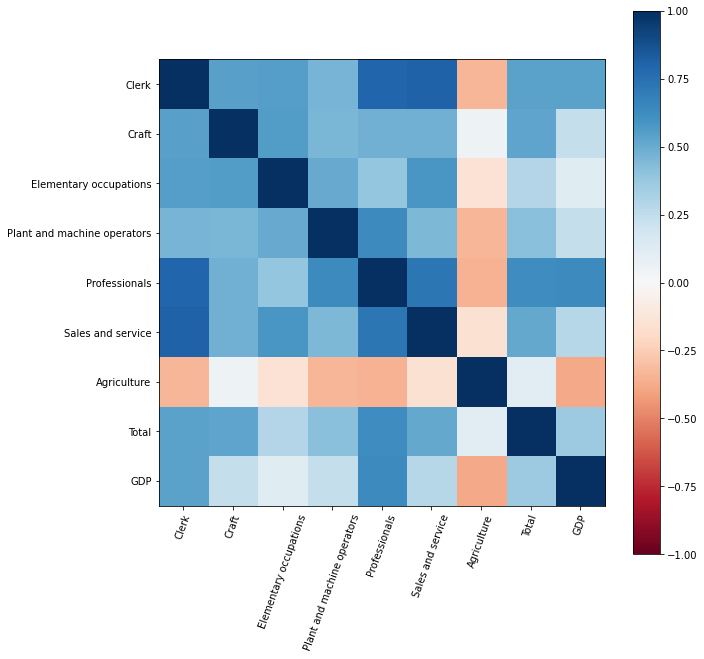

<Figure size 1560x1040 with 0 Axes>

In [55]:
corr_matrix = work.corr()

fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(10, 10)

labels = work.select_dtypes(include=np.number).columns.tolist()

myimage = axes_cor.imshow(corr_matrix, cmap="RdBu", vmin=-1)
# plt.pcolor()
plt.colorbar(myimage)

axes_cor.set_xticks(np.arange(0,corr_matrix.shape[0], corr_matrix.shape[0]*1.0/len(labels)))
axes_cor.set_yticks(np.arange(0,corr_matrix.shape[1], corr_matrix.shape[1]*1.0/len(labels)))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)
  
plt.xticks(rotation=70)
plt.figure(facecolor='w', dpi=260) 
plt.draw()

In [56]:
developed = ['United Kingdom', 'Germany', 'Norway', 'Singapore', 'Canada', 'Australia', 'Qatar', 'Luxembourg']
developing = ['Zambia','Ghana','Armenia','El Salvador','Jamaica','Indonesia','Morocco','Pakistan']

array([<AxesSubplot:ylabel='Occupation'>], dtype=object)

<Figure size 5200x5200 with 0 Axes>

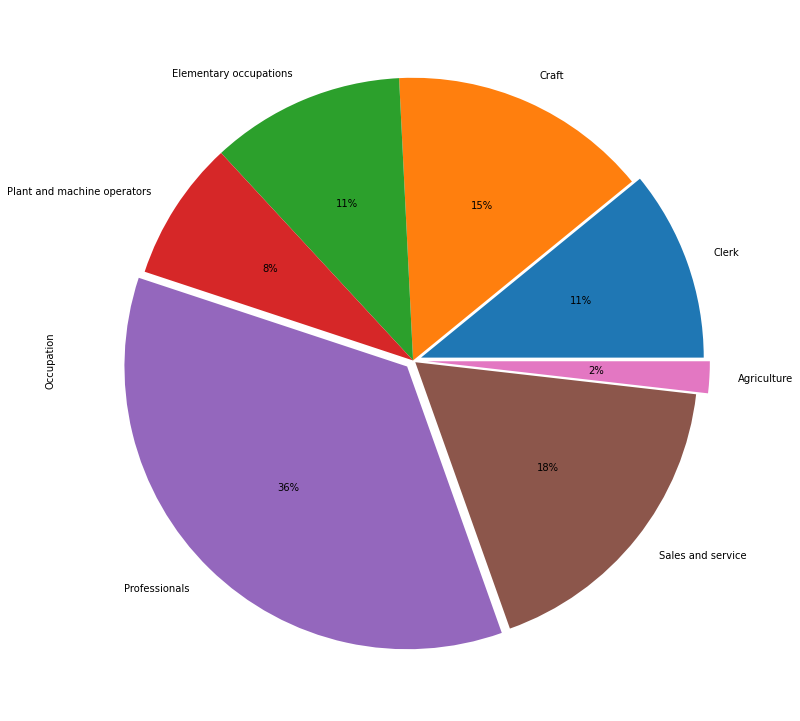

In [106]:
my_explode = [0.03,0.0,0,0,0.03,0.01,0.05]
plt.figure(facecolor='w', dpi=260, figsize=(20,20))
pd.DataFrame(work.loc[developed].drop(columns=['GDP','Total']).mean(), columns=["Occupation"])\
            .plot.pie(subplots=True, legend=None, figsize=(13,13),autopct='%1.0f%%', explode=my_explode)
# pd.DataFrame(work.loc[developing].drop(columns=['GDP','Total']).mean(), columns=["Occupation"]).plot.pie(subplots=True, legend=None)

array([<AxesSubplot:ylabel='Occupation'>], dtype=object)

<Figure size 5200x5200 with 0 Axes>

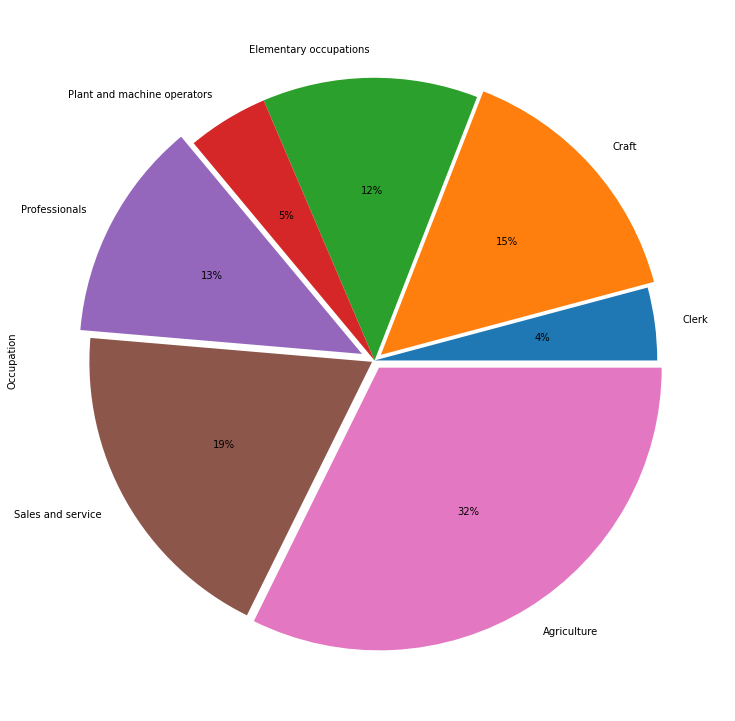

In [105]:
my_explode = [0,0.03,0,0,0.05,0.01,0.03]
plt.figure(facecolor='w', dpi=260, figsize=(20,20))
pd.DataFrame(work.loc[developing].drop(columns=['GDP','Total']).mean(), columns=["Occupation"])\
            .plot.pie(subplots=True, legend=None, figsize=(13,13),autopct='%1.0f%%',explode=my_explode)

In [107]:
# y = work[2015]
# X = work.drop(columns=[2015])
y = work['GDP']
X = work.drop(columns=['GDP'])

splits = train_test_split(X, y, test_size=0.2, random_state=82)
get_results(splits, tree_depth=5, thresh=2000)


------------- Linear Regressor -------------
MSE Train:  17039.991374441557
MSE Test:  30689.013496139534
train accuracy with threshold = 2000  :  0.16071428571428573
test accuracy with threshold = 2000  :  0.06666666666666667

------------- SGDRegressor -------------
MSE Train:  2883952.7356930496
MSE Test:  2074103.3149823295
train accuracy with threshold = 2000  :  0.0
test accuracy with threshold = 2000  :  0.0

------------- Decision Tree Regressor -------------
MSE Train:  3255.6034948782694
MSE Test:  32694.24146786612
train accuracy with threshold = 2000  :  0.6428571428571429
test accuracy with threshold = 2000  :  0.06666666666666667

------------- ExtraTreeRegressor -------------
MSE Train:  5308.28204092554
MSE Test:  30902.413413245224
train accuracy with threshold = 2000  :  0.5
test accuracy with threshold = 2000  :  0.2

------------- RandomForestRegressor -------------
MSE Train:  6719.174506409378
MSE Test:  31559.39325441343
train accuracy with threshold = 2000  :  

# Kaggle Countries Dataset : GDP prediction


https://www.kaggle.com/fernandol/countries-of-the-world

In [132]:
df = pd.read_csv("datasets/kaggle_countries.csv",index_col='Country')
df['Region'] = df['Region'].str.strip()
df.index = df.index.str.strip()

In [133]:
categorical_variables = ['Region','Climate']

null_cols = ['Net migration', 'Infant mortality (per 1000 births)','GDP ($ per capita)', 
             'Literacy (%)', 'Phones (per 1000)', 'Arable (%)','Crops (%)', 'Other (%)', 
             'Climate', 'Birthrate', 'Deathrate','Agriculture', 'Industry', 'Service']

In [134]:
def preprocess_cols(col):
    if df[col].dtypes not in ('int64','float64'):
        df[col] = df[col].str.replace(',','.').astype(float)
for col in df.columns:
    if col not in categorical_variables:
        preprocess_cols(col)

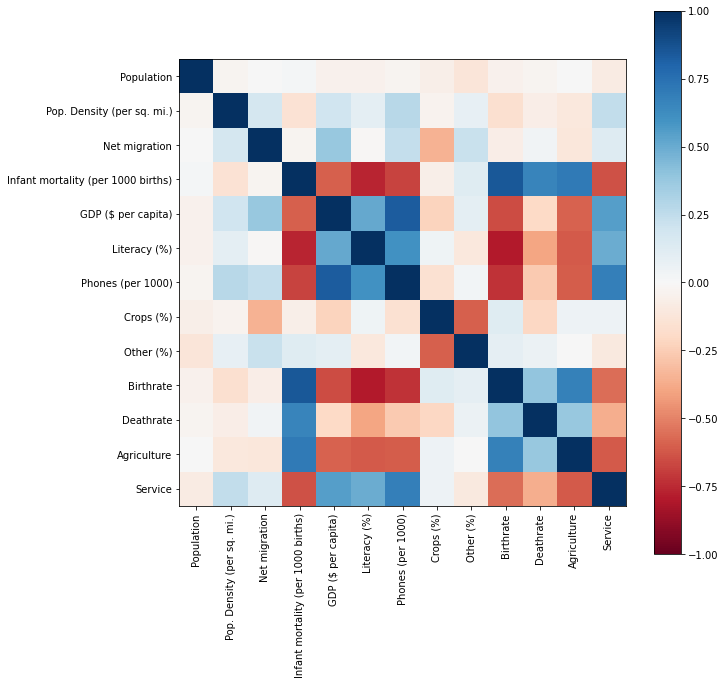

<Figure size 1560x1040 with 0 Axes>

In [135]:
corr_matrix = df.drop(columns = ['Area (sq. mi.)', 'Coastline (coast/area ratio)', 'Arable (%)','Industry']).corr()

fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(10, 10)

labels = df.drop(columns = ['Area (sq. mi.)', 'Coastline (coast/area ratio)', 'Arable (%)','Industry']).select_dtypes(include=np.number).columns.tolist()

myimage = axes_cor.imshow(corr_matrix, cmap="RdBu", vmin=-1)
# plt.pcolor()
plt.colorbar(myimage)

axes_cor.set_xticks(np.arange(0,corr_matrix.shape[0], corr_matrix.shape[0]*1.0/len(labels)))
axes_cor.set_yticks(np.arange(0,corr_matrix.shape[1], corr_matrix.shape[1]*1.0/len(labels)))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)

plt.xticks(rotation=90)
plt.figure(facecolor='w', dpi=260)
plt.draw()

In [136]:

        
def replace_null_with_region_mean(col):
    if df[col].dtypes not in ('int64','float64'):
        df[col] = df[col].str.replace(',','.').astype(float)
    region_mean = dict(df.groupby('Region')[col].mean())
    for region in region_mean:
        df[col].loc[(df['Region']==region) & (df[col].isnull())] = region_mean[region]
        


for col in null_cols:
    if col not in categorical_variables:
        replace_null_with_region_mean(col)
        
        
df = pd.get_dummies(df, columns=categorical_variables)

/Users/patel/opt/anaconda3/envs/ece143/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [137]:
drop_cols = ['GDP ($ per capita)', 'Area (sq. mi.)', 'Coastline (coast/area ratio)', 'Arable (%)','Industry']

In [140]:
print("#### WITHOUT MERGE WITH ENERGY ####")

y = df['GDP ($ per capita)']
# X = df.drop(columns=['GDP ($ per capita)'])
X = df.drop(columns=drop_cols)

splits = train_test_split(X, y, test_size=0.2, random_state=80)
get_results(splits, tree_depth=5, thresh=2000)

#### WITHOUT MERGE WITH ENERGY ####

------------- Linear Regressor -------------
MSE Train:  4332.767484806495
MSE Test:  5235.416505548657
train accuracy with threshold = 2000  :  0.48066298342541436
test accuracy with threshold = 2000  :  0.32608695652173914

------------- SGDRegressor -------------
MSE Train:  1.4145324381844082e+24
MSE Test:  2.245562698734663e+24
train accuracy with threshold = 2000  :  0.0
test accuracy with threshold = 2000  :  0.0

------------- Decision Tree Regressor -------------
MSE Train:  1873.4022723342355
MSE Test:  6900.111181687564
train accuracy with threshold = 2000  :  0.8066298342541437
test accuracy with threshold = 2000  :  0.5434782608695652

------------- ExtraTreeRegressor -------------
MSE Train:  2160.8311612305124
MSE Test:  4641.080200698735
train accuracy with threshold = 2000  :  0.6961325966850829
test accuracy with threshold = 2000  :  0.6086956521739131

------------- RandomForestRegressor -------------
MSE Train:  1671.694416350506

In [141]:
print("#### WITH MERGE ####")

df = df.merge(energy.drop(columns=['GDP']), how='inner', left_index=True, right_index=True)

y = df['GDP ($ per capita)']
# X = df.drop(columns=['GDP ($ per capita)'])
X = df.drop(columns=drop_cols)

splits = train_test_split(X, y, test_size=0.2, random_state=80)
get_results(splits, tree_depth=5, thresh=2000)

#### WITH MERGE ####

------------- Linear Regressor -------------
MSE Train:  2353.8793485802908
MSE Test:  3094.791847145826
train accuracy with threshold = 2000  :  0.6666666666666666
test accuracy with threshold = 2000  :  0.6875

------------- SGDRegressor -------------
MSE Train:  9.098455113994275e+22
MSE Test:  2.8042969063154545e+22
train accuracy with threshold = 2000  :  0.0
test accuracy with threshold = 2000  :  0.0

------------- Decision Tree Regressor -------------
MSE Train:  1221.2143699072242
MSE Test:  5361.979778981654
train accuracy with threshold = 2000  :  0.8888888888888888
test accuracy with threshold = 2000  :  0.53125

------------- ExtraTreeRegressor -------------
MSE Train:  1181.805441945627
MSE Test:  2615.5993783608747
train accuracy with threshold = 2000  :  0.9047619047619048
test accuracy with threshold = 2000  :  0.75

------------- RandomForestRegressor -------------
MSE Train:  1470.1930064418332
MSE Test:  2749.6536600088384
train accuracy with t